### Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("titanic_train.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA and Data Pre-processing

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
#for categorical data
df_train.describe(include=['object']).transpose()

,count,unique,top,freq
Name,891,891,"Goldsmith, Mr. Frank John",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [6]:
#for numerical features
df_train.describe(include=['int64','float64']).transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


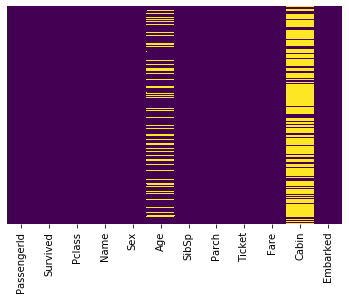

In [7]:
#visualizing all the null values
sns.heatmap(df_train.isnull(),yticklabels = False, cbar = False, cmap ='viridis')
plt.show()

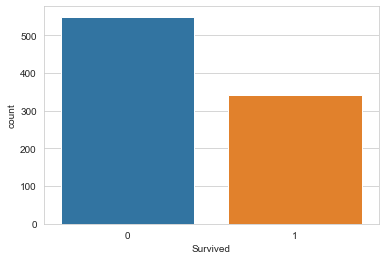

In [8]:
#checking survival rate 
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train)
plt.show()

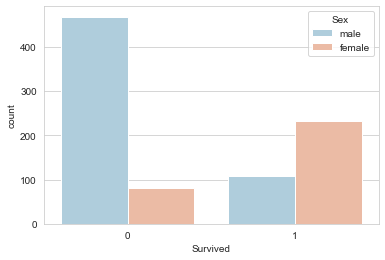

In [9]:
#checking survival rate based on sex
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='RdBu_r')
plt.show()

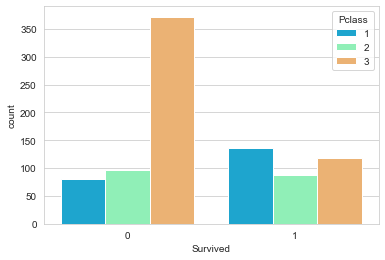

In [10]:
#checking survival rate based on Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette = 'rainbow')
plt.show()

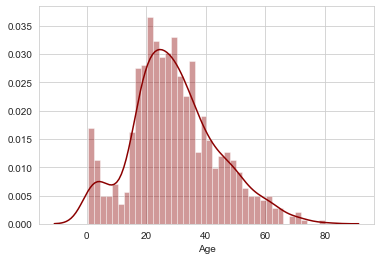

In [11]:
#checking the distribution of the Age column
sns.distplot(df_train['Age'].dropna(),kde=True,color='darkred',bins=40)
plt.show()

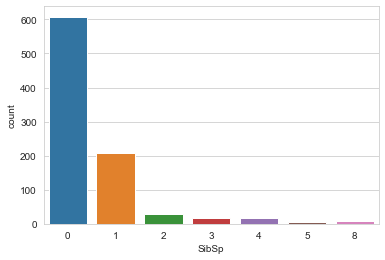

In [12]:
#checking the sibling frequency
sns.countplot(x='SibSp',data=df_train)
plt.show()

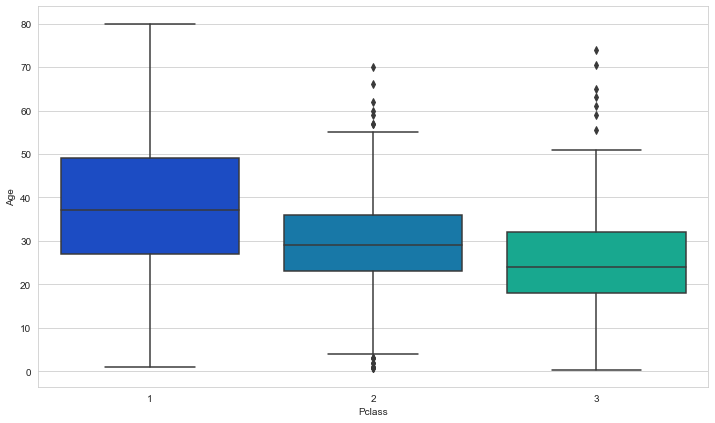

In [13]:
#plotting the age and Pclass as boxplot to find mean of each Pclass group
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')
plt.show()

In [14]:
df_train.Embarked.fillna(df_train['Embarked'].mode().iloc[0],inplace=True)

In [15]:
pclass_grps = df_train.groupby('Pclass')
mean_age = pclass_grps.apply(lambda x: x.Age.mean())
mean_age

Pclass
1    38.233441
2    29.877630
3    25.140620
dtype: float64

In [16]:
def replace_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if(Pclass ==1 ):
            return mean_age.loc[1]
        elif(Pclass ==2):
            return mean_age.loc[2]
        elif(Pclass ==3):
            return mean_age.loc[3]
    else:
        return Age

In [17]:
df_train[['Age']]=df_train[['Age','Pclass']].apply(replace_age,axis=1)

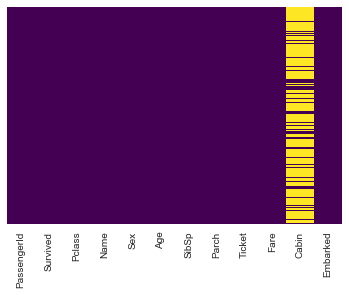

In [18]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [19]:
df_train.drop(['Name','Cabin'],axis=1,inplace=True)

In [20]:
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)
sex = pd.get_dummies(df_train['Sex'],drop_first=True)

In [21]:
df_train.drop(['Sex','Embarked','Ticket'],axis=1,inplace=True)

In [22]:
df_train = pd.concat([df_train,sex,embark],axis=1)

In [23]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Building the model

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(df_train.drop('Survived',axis=1),df_train['Survived'],test_size=.30,random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\No_ob0dy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = logmodel.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
accuracy = confusion_matrix(y_test,y_pred)

In [31]:
accuracy

array([[135,  19],
       [ 41,  73]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
acc

0.7761194029850746

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.79      0.64      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268

